In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("./Datasets9/PS_20174392719_1491204439457_log.csv")

In [3]:
df["isFraud"].unique()
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

dobbiamo effettuare il one hot encoding su alcuni dei parametri presenti nel nostro dataframe

In [4]:
#df['type'].unique()
df['type'] = pd.factorize(df['type'])[0]
df['nameDest'] = pd.factorize(df['nameDest'])[0]
df['nameOrig'] = pd.factorize(df['nameOrig'])[0]
# df['type'].unique()

andiamo ad eliminare le colonne nameOrig e nameDest che sono colonne che non hanno alcun valore informativo per la nostra classificazione 

In [5]:
df = df.drop("isFlaggedFraud",axis = 1)

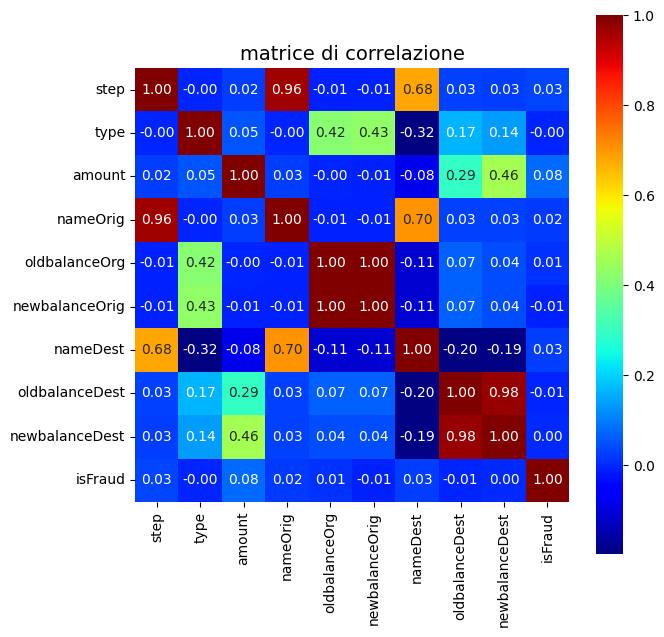

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(7,7))
plot = sns.heatmap(corr_matrix, vmax = 1,square = True, annot=True,fmt=".2f", cmap="jet",robust = True)

plt.title("matrice di correlazione", fontsize = 14)
plt.show()

##########################################################################
Classificatore: Nearest Neighbors
0.9993642556053952
Accuracy: 1.00
----------------------------------
AUC-ROC score: 0.8023624739090317
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.8640692640692641
----------------------------------
Recall (true positive rate):

0.6048484848484849
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.7115864527629234
----------------------------------
Confusion Matrix:

[[1270717     157]
 [    652     998]]
----------------------------------
Cross accuracy: 0.6945261543200757
Cross precision: 0.596062466012719
Cross recall: 0.6122319939643972
Cross f_score: 0.44741021186606067


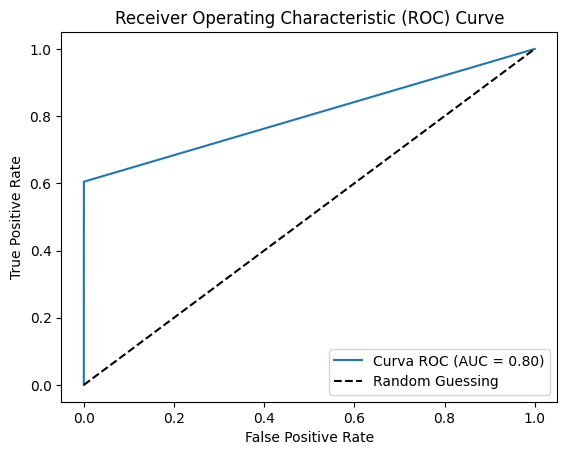

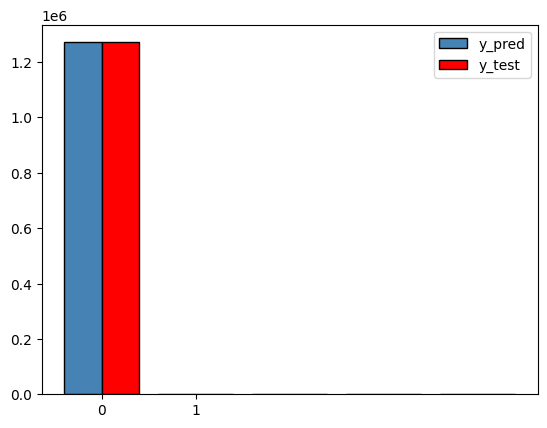

##########################################################################
Classificatore: Decision Tree
0.9991285036667285
Accuracy: 1.00
----------------------------------
AUC-ROC score: 0.6996505449530532
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.8481338481338482
----------------------------------
Recall (true positive rate):

0.3993939393939394
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.5430572723526988
----------------------------------
Confusion Matrix:

[[1270756     118]
 [    991     659]]
----------------------------------
Cross accuracy: 0.8004347265749014
Cross precision: 0.8939664502752697
Cross recall: 0.5803794077657406
Cross f_score: 0.5337358078892925


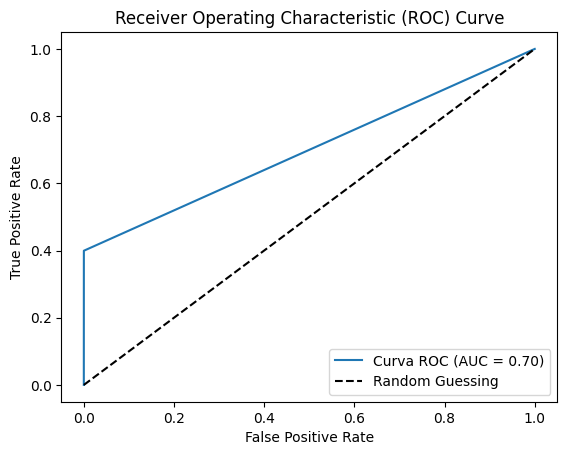

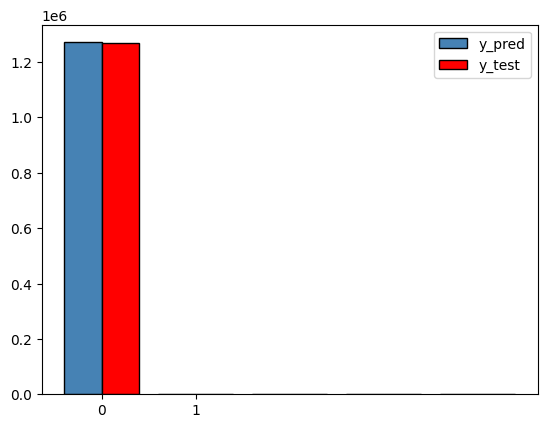

##########################################################################
Classificatore: Random Forest
0.998748943045475
Accuracy: 1.00
----------------------------------
AUC-ROC score: 0.5175757575757576
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

1.0
----------------------------------
Recall (true positive rate):

0.03515151515151515
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.06791569086651053
----------------------------------
Confusion Matrix:

[[1270874       0]
 [   1592      58]]
----------------------------------


C:\Users\renat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross accuracy: 0.8027898884421827
Cross precision: 0.7996385182398889
Cross recall: 0.5199046895334156
Cross f_score: 0.43718034535256134


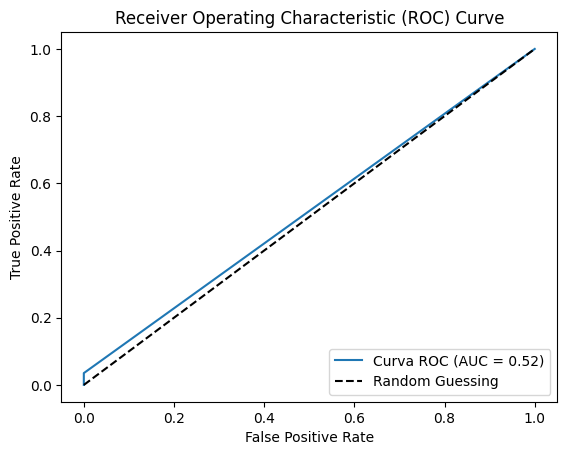

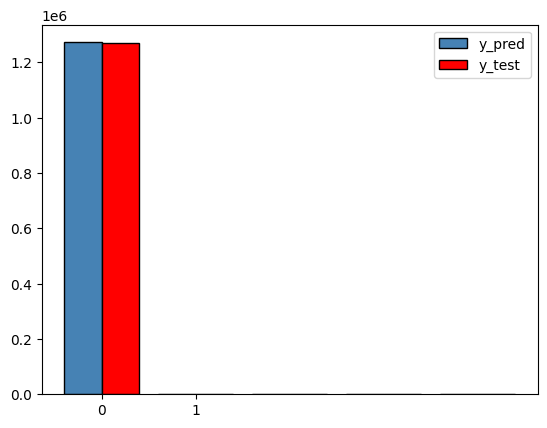

##########################################################################
Classificatore: Naive Bayes
0.47136242617035123
Accuracy: 0.47
----------------------------------
AUC-ROC score: 0.6760212158456831
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.002157391663031447
----------------------------------
Recall (true positive rate):

0.8812121212121212
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.00430424563210837
----------------------------------
Confusion Matrix:

[[598366 672508]
 [   196   1454]]
----------------------------------
Cross accuracy: 0.465921271425922
Cross precision: 0.5009153207706586
Cross recall: 0.6720563888252966
Cross f_score: 0.31723375912791696


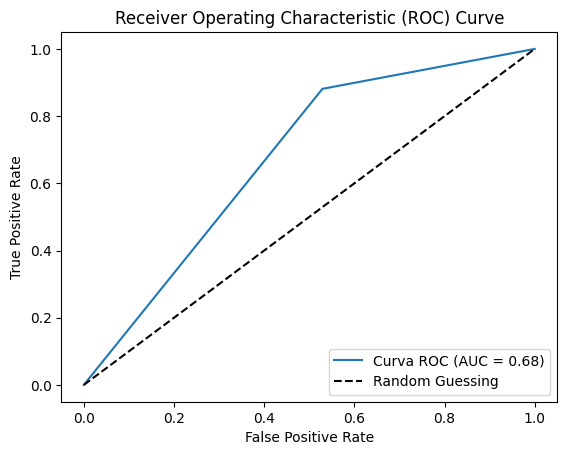

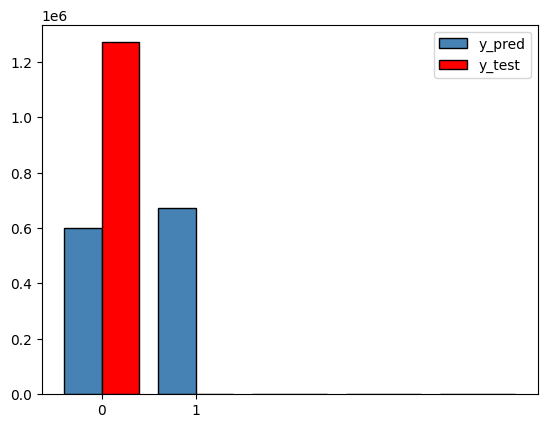

In [7]:
from sklearn.model_selection import train_test_split
# classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB as NB
#metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#cross validation
from sklearn.model_selection import cross_validate


x = df.drop("isFraud",axis=1)
y = df["isFraud"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle = True)

names = ["Nearest Neighbors", "Decision Tree","Random Forest", "Naive Bayes"]
# , "Linear SVM"

classifiers = [KNeighborsClassifier(3),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               NB()]

for name, clf in zip(names, classifiers):
    print("##########################################################################")
    print("Classificatore: " + name)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    print("Accuracy: %0.2f" % accuracy_score(y_test, y_pred))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    print("----------------------------------")
    print("AUC-ROC score:", auc_roc)
    print("----------------------------------")
    
    print("Precision (numero di istanze correttamente predette dal modello):\n")
    precision = precision_score(y_test, y_pred)
    print(precision)
    print("----------------------------------")

    
    print("Recall (true positive rate):\n")
    recall = recall_score(y_test, y_pred)
    print(recall)
    print("----------------------------------")
    
    print("F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):\n")
    f1 = f1_score(y_test, y_pred)
    print(f1)
    print("----------------------------------")
    
    print("Confusion Matrix:\n")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("----------------------------------")
    
    #Eseguo cross-validation per 'migliorare' il classificatore
    scoring = {'precision':'precision_macro', 'recall':'recall_macro', 'f1_score':'f1_macro', 'accuracy':'accuracy'}
    score = cross_validate(clf, x, y, scoring=scoring)
    cross_precision = score['test_precision'].mean()
    cross_accuracy = score['test_accuracy'].mean()
    cross_f_score = score['test_f1_score'].mean()
    cross_recall = score['test_recall'].mean()
    
    #Stampiamo le metriche della cross validation
    print('Cross accuracy:',cross_accuracy)
    print('Cross precision:',cross_precision)
    print('Cross recall:',cross_recall)
    print('Cross f_score:',cross_f_score)

    # Plot the ROC curve
    # plt.plot(fpr, tpr, label='ROC curve')
    # plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    plt.hist([y_pred,y_test],  bins=[0,1,2,3,4,5], label = ["y_pred","y_test"], align = "left",color=['steelblue',"red"], edgecolor='black')
    plt.xticks([0,1])
    plt.yscale("linear")
    plt.legend()
    plt.show()